In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [131]:
songs_table = pd.read_csv("../Data/SpotifyFeatures.csv")
samples, features = songs_table.shape
print(f'There are {samples} samples in the dataset.')
print(f'There are {features} features in the dataset.')

There are 232725 samples in the dataset.
There are 18 features in the dataset.


In [132]:
pop_music = songs_table[songs_table['genre'] == 'Pop'].copy()
clas_music = songs_table[songs_table['genre'] == 'Classical'].copy()

pop_music.loc[:, 'label'] = 1
clas_music.loc[:, 'label'] = 0

pop_number = pop_music.shape[0]
class_number = clas_music.shape[0]
print(f'There are {pop_number} Pop music songs.')
print(f'There are {class_number} Classical music songs.')

pop_features = pop_music[['liveness', 'loudness']].values
pop_labels = pop_music['label'].values

clas_features = clas_music[['liveness', 'loudness']].values
clas_labels = clas_music['label'].values

# Combine Pop music samples with Classical music samples.
features = np.vstack((pop_features, clas_features))
labels = np.concatenate((pop_labels, clas_labels))

There are 9386 Pop music songs.
There are 9256 Classical music songs.


In [133]:
training = 0.8 # <-- Ratio of how many samples we want to use for training.
training_samples = int(len(features) * training)

# Add shuffling/randomising of data for training and testing.
np.random.seed(30) # <-- Reproducibility, so we will get the same output every time.
indices = np.arange(len(features))  # Create an array of indices
np.random.shuffle(indices)    
features_shuffled = features[indices]
labels_shuffled = labels[indices]

# Split the data into training and test sets

#Training should be 80% of all samples.
X_train = features_shuffled[:training_samples]    
y_train = labels_shuffled[:training_samples]      

#Testing should be 20% of all samples.
X_test = features_shuffled[training_samples:]     
y_test = labels_shuffled[training_samples:]   

#We can test it by printing training set and test set.
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Test set has {X_test.shape[0]} samples.")

Training set has 14913 samples.
Test set has 3729 samples.


Alternative way to split the data by using "train_test_split".

In [134]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=30)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Test set has {X_test.shape[0]} samples.")

Training set has 14913 samples.
Test set has 3729 samples.


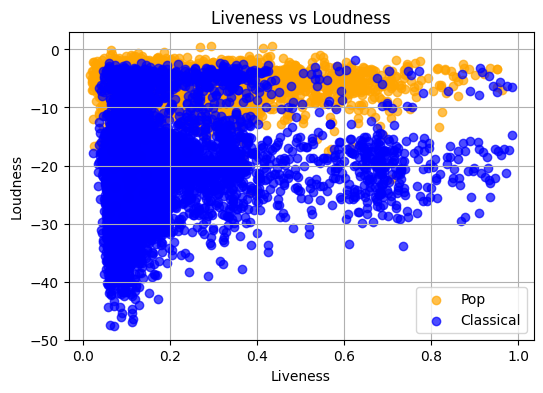

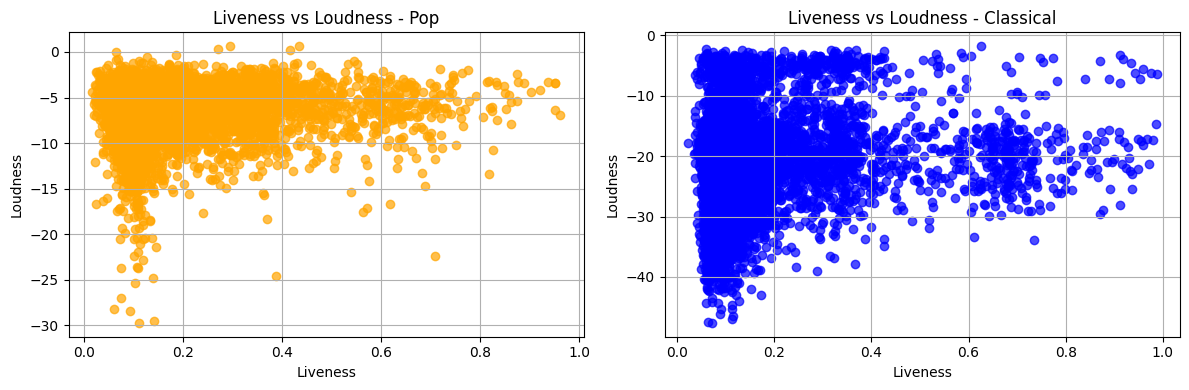

In [135]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Pop', alpha=0.7)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Classical', alpha=0.7)
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Liveness vs Loudness')
plt.legend()
plt.grid(True)
plt.show()

# Create a subplot for Pop and Classical plots to observe data separately.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Pop plot.
ax1.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', alpha=0.7)
ax1.set_xlabel('Liveness')
ax1.set_ylabel('Loudness')
ax1.set_title('Liveness vs Loudness - Pop')
ax1.grid(True)

# Classical plot.
ax2.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', alpha=0.7)
ax2.set_xlabel('Liveness')
ax2.set_ylabel('Loudness')
ax2.set_title('Liveness vs Loudness - Classical')
ax2.grid(True)

# Adjust the layout.
plt.tight_layout()
plt.show()